### Topics 

- Assumptions of Machine Learning 
- Polynomial Regression
- multi coliniarity
- Under fitting and Overfitting

### Multiple Linear Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [7]:
data = fetch_california_housing()
data
print(data.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
#data
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df.drop("Price", axis = 1)
y = df['Price']


In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:

print(model.coef_)
print(len(model.coef_))

[ 0.83265521  0.12186056 -0.2692169   0.31217484 -0.00634786 -0.04074974
 -0.90369005 -0.8787625 ]
8


In [ ]:
y_pred = model.predict(X_test)

In [20]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

mean_absolute_error(y_test, y_pred)
mean_absolute_error(y_test, y_pred)

np.float64(0.5352476763196591)

# assumption In Linear Regression

- Homoscedasticity

The variance of residuals should be approximately equal for all predicted values of the dependent variable.

- Normality - Errors are normally distributed

The residuals should be normally distributed.Linear relationship

There is a linear relationship between the dependent and independent variables

The error terms are normally distributed and the data do not contain outliers

- Independence of errors

The residual errors are independent of each other. 

- No or low multicollinearity

There is no or little collinearity among input variables

Linear regression, a statistical method for examining the relationship between variables, relies on several key assumptions to ensure accurate and reliable results. These assumptions include linearity, independence, homoscedasticity, normality, and no multicollinearity. 
###### Key Assumptions of Linear Regression: 

1. Linearity:
The relationship between the independent and dependent variables is assumed to be linear, meaning a straight-line relationship. 
2. Independence:
The observations (data points) are assumed to be independent of each other, meaning there is no correlation or relationship between them. 
3. Homoscedasticity:
The variance of the errors (residuals) is assumed to be constant across all observations. This means that the spread of the errors is roughly the same regardless of the value of the independent variables. 
4. Normality:
The errors (residuals) are assumed to be normally distributed. 
5. No Multicollinearity:
The independent variables should not be highly correlated with each other. High multicollinearity can make it difficult to determine the individual impact of each independent variable on the dependent variable. 

###### Violations and Consequences:
- Violation of Linearity:
If the relationship between variables is not linear, a linear regression model may not accurately capture the true relationship, leading to biased predictions. 
- Violation of Independence:
If observations are not independent, the estimates of the regression coefficients may be inaccurate and unreliable, especially in time series data where past observations might influence future ones. 
- Violation of Homoscedasticity:
If the variance of errors is not constant, the standard errors of the regression coefficients might be underestimated, leading to unreliable hypothesis tests and confidence intervals. 
- Violation of Normality:
If errors are not normally distributed, the statistical tests (t-tests, F-tests) used in linear regression might not be valid, and the confidence intervals may not be accurate. 
- Violation of No Multicollinearity:
If independent variables are highly correlated, it can be difficult to determine the individual impact of each variable, and the standard errors of the coefficients may increase, making it hard to draw conclusions. 

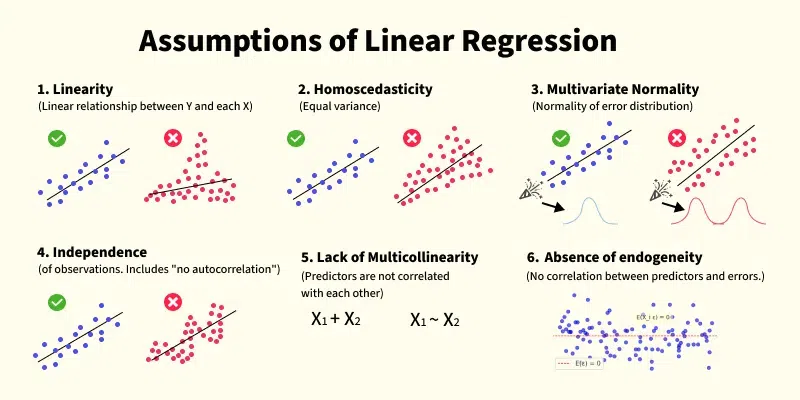

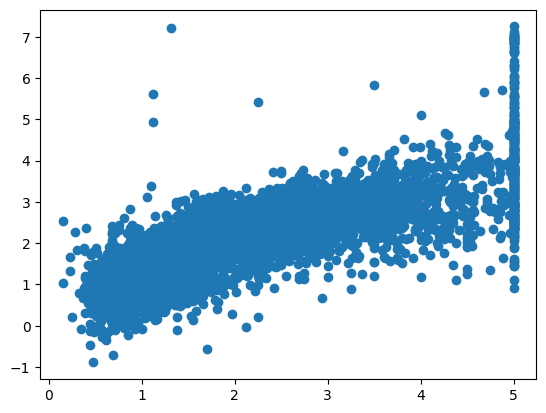

In [23]:
#assumption   1. distributions bw errors are linear
plt.scatter(y_test, y_pred)

C:\Users\hp\AppData\Local\Temp\ipykernel_25368\381831063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Price', ylabel='Density'>

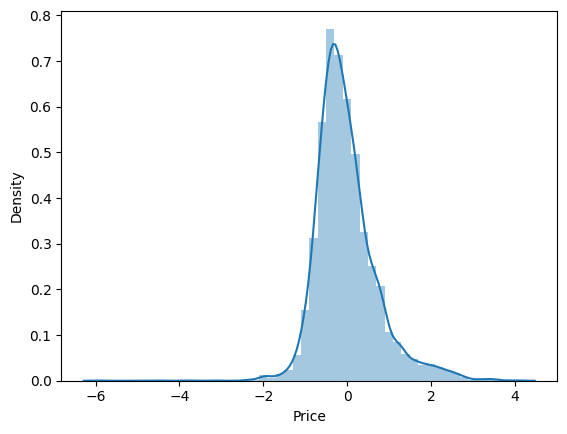

In [25]:
# 2. error are normaly distributed
import seaborn as sns
error = y_test-y_pred
sns.distplot(error)

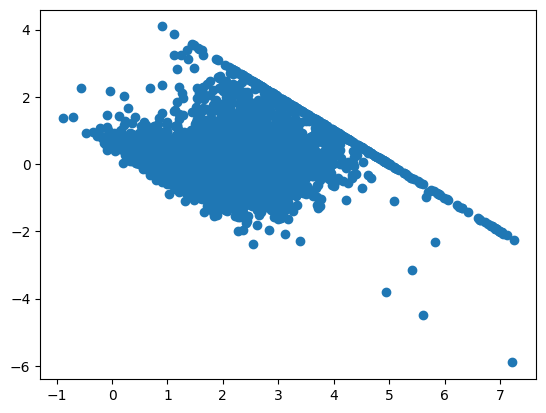

In [26]:
# 3. 
plt.scatter(y_pred, error)   # Plot the predicted values against the error homodacity


#### MultiColiniarity
(optional)

- What it is

Multicollinearity occurs when independent variables are correlated, which can make it difficult to estimate each variable's relationship with the outcome variable. 

- Why it's a problem

Multicollinearity can negatively impact model predictions on unseen data, and can make it difficult to explain the model's behavior. 

- How to detect it

A correlation matrix can help identify multicollinearity, but a heatmap of correlations can be more intuitive. A variance inflation factor (VIF) can also be used to measure the amount of multicollinearity. 

- How to address it

If multicollinearity is detected, it can be addressed by using a VIF to identify the correlated variables, and then removing or transforming those variables

In [47]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target

<Axes: >

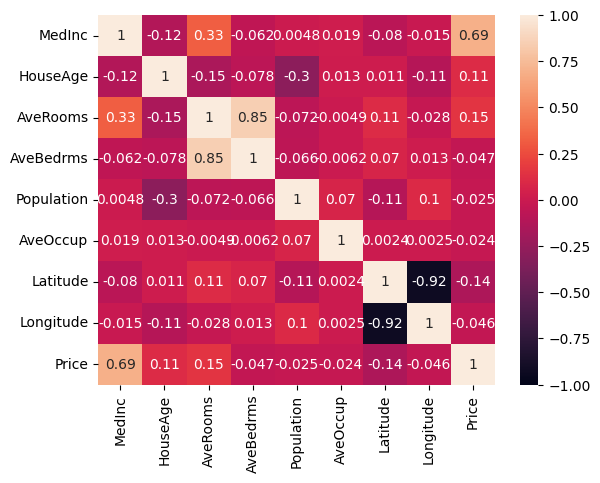

In [49]:
#multicollinearity>> when one feature is explained by all other features
#when two features>> correlation
#more than two features>> vif, clustermap

sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)


<Figure size 500x500 with 0 Axes>

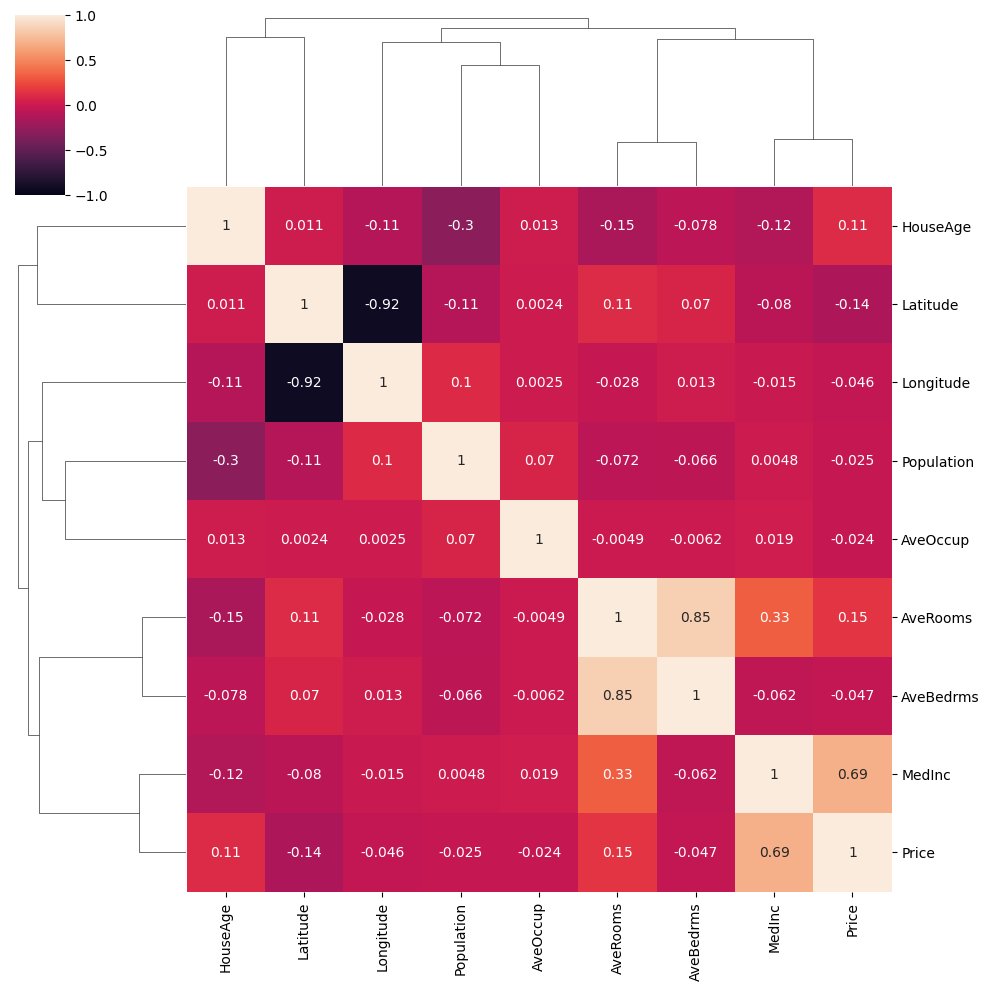

In [50]:
#clustermap table shows group(cluster ) relationship
plt.figure(figsize = (5, 5))
sns.clustermap(df.corr(), vmin = -1, vmax =1, annot = True)

### What is the function of variance_inflation_factor?
Variance Inflation Factor (VIF)

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df.columns
vif

vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [52]:
df1 = df.copy()

df1.drop("Longitude", axis=1, inplace=True)
df1
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [53]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [54]:
df1.drop("AveRooms", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [55]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [56]:
df1.drop("Latitude", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [ ]:
df1.drop("Latitude", axis=1, inplace=True)
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [58]:
df1
X = df1.iloc[:, :-1]
y = df1.iloc[:,-1]

# and then train  the model


Recursive Feature Elimination (RFE) is a feature selection method that iteratively removes features and trains a model on the remaining ones, evaluating its performance at each step. By repeatedly eliminating the least important features, RFE identifies the features that contribute most to the model's accuracy. It's a valuable tool for simplifying models and improving their efficiency. 

Here's a more detailed explanation:

How it Works:

1. Initial Model Training:
RFE begins by training a model (e.g., a linear regression model) on the full set of features.
2. Feature Importance Evaluation:
The model's coefficients or feature importance scores are used to rank the features.
3. Feature Elimination:
The least important feature is removed.
4. Recursive Process:
The model is retrained with the reduced feature set, and the process (steps 2 and 3) is repeated until the desired number of features is reached or a stopping criteria is met.
5. Final Feature Set:
The remaining features are considered the most important and are included in the final model. 

#### Benefits of RFE:
- Simpler Models:
RFE helps reduce the complexity of models by removing redundant or irrelevant features. 
- Improved Efficiency:
Fewer features can lead to faster training and prediction times. 
- Feature Importance Identification:
RFE provides insights into which features are most predictive for the target variable. 
- Generalization Improvement:
By removing noise and irrelevant features, RFE can help improve a model's ability to generalize to unseen data. 
- Implementation:
RFE is often implemented using libraries like scikit-learn or Yellowbrick in Python. These libraries provide functions that automate the process of feature elimination and model training. 
#### Example:
Imagine you're building a model to predict customer churn. You might have a dataset with 50 features related to customer demographics, usage patterns, and support interactions. By using RFE, you can identify that only 15 of these features (e.g., payment history, usage patterns, and support tickets) are most important for predicting churn, allowing you to simplify the model and improve its performance. 

In [59]:
#RFE >> recruseive feature elimination
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.feature_selection import RFE

rfe = RFE(estimator = LinearRegression(), n_features_to_select=6)

rfe.fit(X, y)

rfe.predict(X)

rfe.support_

X.columns

rfe.ranking_


array([1, 1, 1, 1, 3, 2, 1, 1])

# Polynomial Regression
Polynomial regression is a type of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled using a polynomial equation. The degree of the polynomial is determined by the number
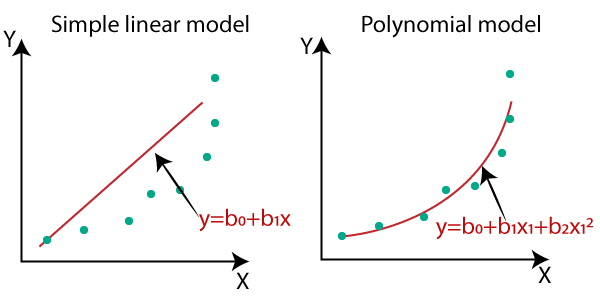

- https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
- https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/  implementations

Polynomial regression is a type of regression analysis that uses a polynomial equation to model the relationship between a dependent variable and one or more independent variables. Unlike linear regression, which assumes a linear relationship, polynomial regression allows for more complex, non-linear relationships to be captured. 

##### Key Characteristics:
- Non-linear relationships:
Polynomial regression is used when the relationship between the independent and dependent variables is not best described by a straight line. 
- Polynomial equation:
The model uses a polynomial equation, where the independent variable is raised to different powers (e.g., x, x², x³). 
- Degree of the polynomial:
The degree of the polynomial determines the complexity of the model. Higher degrees allow for more complex curves to be fit to the data. 
- Multiple independent variables:
Polynomial regression can handle multiple independent variables, allowing for more complex relationships to be modeled. 
##### How it Works:
Polynomial Regression: An Introduction | Built In
Polynomial regression uses the least squares method to find the best-fit polynomial equation for the data. This involves minimizing the difference between the predicted values from the polynomial equation and the actual values. 
###### Example:
If you're trying to model the relationship between the temperature of a chemical reaction and the yield of the reaction, a linear model might not be sufficient. In this case, polynomial regression could be used to capture a more complex relationship, such as a quadratic relationship where the yield increases initially with temperature, then decreases at higher temperatures. 
###### When to Use:
When the relationship between the variables is not linear.
When you need to capture more complex, non-linear relationships.
When you suspect that a higher-order polynomial term might be important in explaining the relationship. 
###### Advantages:
Can model complex non-linear relationships.
Can improve the accuracy of predictions compared to linear regression. 
###### Disadvantages:
Can be prone to overfitting if the degree of the polynomial is too high.
May require more data to train the model compared to linear regression.
Can be difficult to interpret the results if the model is too complex. 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

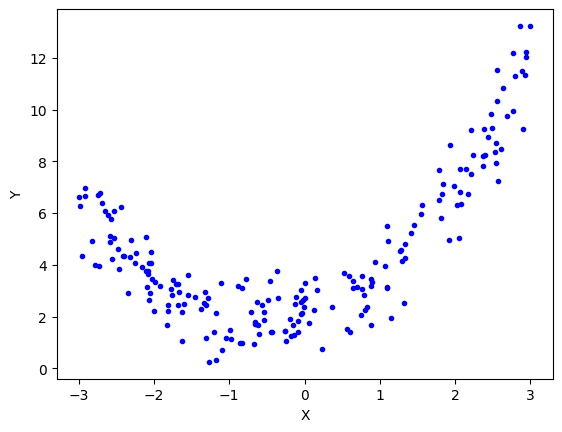

In [61]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [63]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=43)

0.1721514528647713


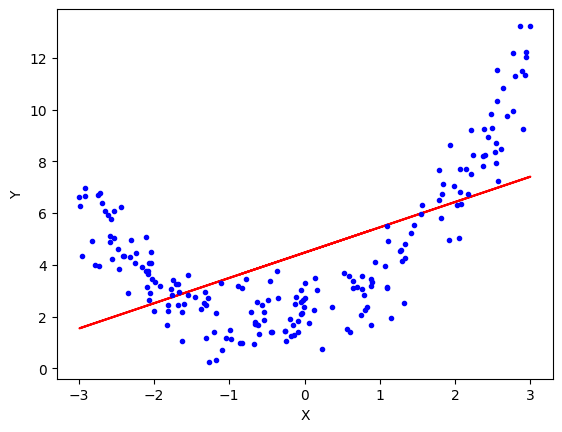

In [64]:
# Simple linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [66]:
# polynomial Regression
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

print(lr.coef_)
print(lr.intercept_)



0.885897855957501
[[0.         0.9123559  0.79380177]]
[1.97254213]


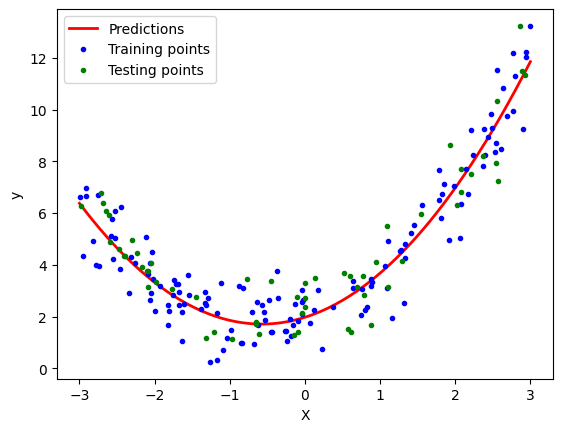

In [67]:

# image show 
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## END

## Next will learn

- Regularization
- Underfitting and Overfitting
- bias variance 
- bias -variance tradeoff
- Cross Validation